<a href="https://colab.research.google.com/github/taminhtri2003/EMG-Signal-Processing-Library/blob/master/Lecture_05_2_Tutorial_DNN_with_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial: Multiclass Classification with Scikit-learn and Tensorflow

## Tutorial 1: Multiclass-Classification with Scikit-learn in MNIST-Fashion

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

### Data Preprocessing

In [ ]:
# MNIST-Fashion

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print('train:', x_train.shape, y_train.shape)
print('test:', x_test.shape, y_test.shape)

train: (60000, 28, 28) (60000,)
test: (10000, 28, 28) (10000,)


In [ ]:
# label/ ground truth

print('y train:', y_train[:10])
print('y test:', y_test[:10])

y train: [9 0 0 3 0 2 7 2 5 5]
y test: [9 2 1 1 6 1 4 6 5 7]


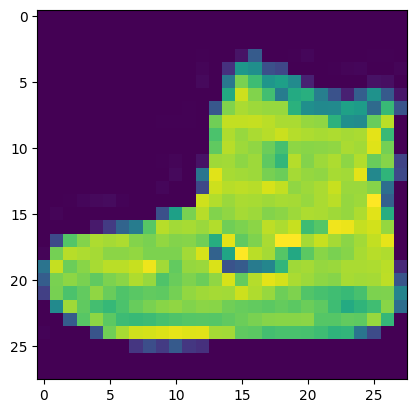

True

In [ ]:
plt.imshow(x_train[0, :, :])
plt.show()

import cv2
cv2.imwrite('a.jpg', x_train[0])

In [ ]:
# chuyển ảnh 2 chiều thành vector 1 chiều
x_train = np.reshape(x_train, [60000, 28*28]) # reshape(x, [-1, 28*28])
x_test = np.reshape(x_test, [10000, 28*28])

print('train', x_train.shape)
print('test', x_test.shape)

train (60000, 784)
test (10000, 784)


### Model Implementation

In [ ]:
! pip install scikit-learn

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier = LogisticRegression(multi_class='multinomial')
print(classifier)

LogisticRegression(multi_class='multinomial')


In [ ]:
classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

### Model Evaluation

In [ ]:
result = classifier.score(x_train, y_train)
print(result)

0.8632


In [ ]:
result = classifier.score(x_test, y_test)
print(result)

0.8412


In [ ]:
predictions = classifier.predict(x_train[:10])
print(predictions)
print(y_train[:10])

[9 0 0 3 3 2 7 2 5 5]
[9 0 0 3 0 2 7 2 5 5]


In [ ]:
prediction = classifier.predict_proba([x_train[0]])
print(prediction)
print(np.argmax(prediction))

[[6.25162165e-10 4.88794962e-10 6.50713898e-10 5.53450313e-10
  4.05326306e-10 3.01595373e-03 2.46681327e-07 4.79329261e-04
  4.00943905e-06 9.96500458e-01]]
9


In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = classifier.predict(x_train)
cfm = confusion_matrix(y_train, predictions)

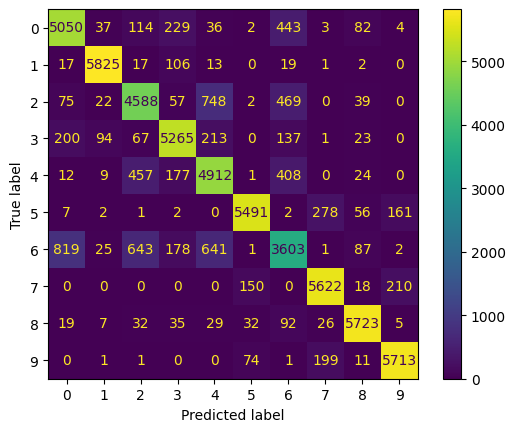

In [ ]:
disp = ConfusionMatrixDisplay(cfm)
disp.plot()

### Deployment

In [ ]:
import pickle

pickle.dump(classifier, open('mnist-fashion-classifier.pk', 'wb'))

In [ ]:
model = pickle.load(open('mnist-fashion-classifier.pk', 'rb'))

In [ ]:
print(model)

LogisticRegression(multi_class='multinomial')


In [ ]:
model.predict(x_test[:5])

array([9, 2, 1, 1, 6], dtype=uint8)

## Tutorial 2: Multiclass-classification with Scikit-learn in Facescrub

In [ ]:
# https://drive.google.com/file/d/1PT8eowy5JnkwnqFBPyJ7UkfyT9ezN_xv/view?usp=drive_link

In [ ]:
! cp /content/drive/MyDrive/MMDS-data/FaceScrub-faces-mini.zip .

In [ ]:
! unzip -q FaceScrub-faces-mini.zip

In [ ]:
! rm -rf __MACOSX

In [ ]:
import cv2
import glob

In [ ]:
files = glob.glob('FaceScrub-faces-mini/*/*.jpg')
print(len(files))
for it in files[:5]:
  print(it)

858
FaceScrub-faces-mini/Dwayne_Johnson/Dwayne_Johnson_034216_018231.jpg
FaceScrub-faces-mini/Dwayne_Johnson/Dwayne_Johnson_034091_018181.jpg
FaceScrub-faces-mini/Brad_Pitt/Brad_Pitt_014126_008161.jpg
FaceScrub-faces-mini/Brad_Pitt/Brad_Pitt_014198_008199.jpg
FaceScrub-faces-mini/T.J._Thyne/T.J._Thyne_105996_053975.jpg


In [ ]:
import os

folders = glob.glob('FaceScrub-faces-mini/*')
folders = [os.path.basename(it) for it in folders]
folders.sort()
for it in folders[:5]:
  print(it)

dict_names = {name:indx for indx, name in enumerate(folders)}
print(dict_names)

Adam_McKay
Adam_Sandler
Adrien_Brody
Adrienne_Barbeau
Adrienne_Frantz
{'Adam_McKay': 0, 'Adam_Sandler': 1, 'Adrien_Brody': 2, 'Adrienne_Barbeau': 3, 'Adrienne_Frantz': 4, 'Al_Pacino': 5, 'Alan_Alda': 6, 'Alan_Arkin': 7, 'Alan_Rickman': 8, 'Alec_Baldwin': 9, 'Alexander_Skarsgård': 10, 'Alfred_Molina': 11, 'Allison_Janney': 12, 'Alyson_Hannigan': 13, 'Amanda_Bearse': 14, 'Amaury_Nolasco': 15, 'America_Ferrera': 16, 'Amy_Davidson': 17, 'Andrea_Anders': 18, 'Andrea_Bogart': 19, 'Andrea_Bowen': 20, 'Andy_Garcia': 21, 'Andy_Richter': 22, 'Andy_Serkis': 23, 'Angell_Conwell': 24, 'Angie_Harmon': 25, 'Anthony_Hopkins': 26, 'Arnold_Vosloo': 27, 'Ashley_Benson': 28, 'Ashley_Johnson': 29, 'Ashley_Jones': 30, 'Ashton_Kutcher': 31, 'Barbara_Carrera': 32, 'Ben_Affleck': 33, 'Ben_Kingsley': 34, 'Ben_McKenzie': 35, 'Ben_Stiller': 36, 'Benicio_Del_Toro': 37, 'Bernard_Hill': 38, 'Bernie_Mac': 39, 'Bill_Cosby': 40, 'Bill_Hader': 41, 'Bill_Murray': 42, 'Bill_Nighy': 43, 'Billy_Bob_Thornton': 44, 'Billy_Za

In [ ]:
import cv2

def load_data(filename, dict_names):
  img = cv2.imread(filename)
  img = cv2.resize(img, (64, 64))
  img = np.reshape(img, [-1])
  parent = os.path.dirname(filename)
  name = os.path.basename(parent)
  label = dict_names[name]
  return img, label

img, label = load_data(files[0], dict_names)

In [ ]:
print(img.shape, label)

(12288,) 107


In [ ]:
data = []
labels = []
for it in files:
  img, label = load_data(it, dict_names)
  data.append(img)
  labels.append(label)

data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(858, 12288) (858,)


In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)
print('train:', x_train.shape, y_train.shape)
print('test:', x_test.shape, y_test.shape)

train: (600, 12288) (600,)
test: (258, 12288) (258,)


In [ ]:
classifier = LogisticRegression(multi_class='multinomial')
classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
print('train:', classifier.score(x_train, y_train))
print('test:', classifier.score(x_test, y_test))

train: 1.0
test: 0.011627906976744186


In [ ]:
test_img = cv2.imread('test.jpg')
print(test_img.shape)

test_img = cv2.resize(test_img, (64, 64))
test_img = np.reshape(test_img, [-1])
prediction = classifier.predict([test_img])[0]
print(prediction)

(600, 600, 3)
263


## Tutorial 3: Multiclass-Classification with Tensorflow in CIFAR-10

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
print(tf.__version__)

2.3.0


170500096/170498071 [==============================] - 2s 0us/step
train: (50000, 32, 32, 3) (50000, 1)
test: (10000, 32, 32, 3) (10000, 1)
y train: [[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
y test: [[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


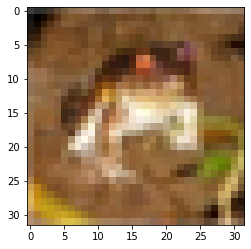

In [ ]:
# load CIFAR data set
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print('train:', x_train.shape, y_train.shape)
print('test:', x_test.shape, y_test.shape)
print('y train:', y_train[:10])
print('y test:', y_test[:10])

plt.imshow(x_train[0, :, :])

In [ ]:
def list_to_onehot(x, num_class=10):
  onehot = np.zeros([x.shape[0], num_class], dtype=np.float64)
  onehot[np.arange(x.shape[0]), x[:, 0].astype(int)] = 1.0
  return onehot

def split_train_val(x, y, rate_train=0.7):
  indices = np.arange(x.shape[0])
  np.random.shuffle(indices)
  i = int(x.shape[0]*rate_train)
  return (x[indices[:i]], y[indices[:i]]), (x[indices[i:]], y[indices[i:]])

preprocess_samples = lambda x : x / 255.

(x_train, y_train), (x_val, y_val) =  split_train_val(x_train, y_train)
x_train = preprocess_samples(x_train)
x_val = preprocess_samples(x_val)
x_test = preprocess_samples(x_test)

y_train = list_to_onehot(y_train)
y_val = list_to_onehot(y_val)
y_test = list_to_onehot(y_test)
for it in y_train[:10]:
  print(it)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# create a simple DNN model
model = tf.keras.models.Sequential(name='simple_dnn')
model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))
model.add(tf.keras.layers.Softmax())
model.summary()

model.compile(loss=tf.keras.losses.CategoricalCrossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

Model: "simple_dnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               786688    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
_________________________________________________________________
softmax_1 (Softmax)          (None, 10)                0         
Total params: 789,258
Trainable params: 789,258
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train model
history = model.fit(x_train,
          y_train,
          batch_size=128,
          epochs=8,
          verbose=1,
          validation_data=(x_val, y_val))

Epoch 1/8
274/274 [==============================] - 4s 16ms/step - loss: 2.1393 - accuracy: 0.2497 - val_loss: 2.0702 - val_accuracy: 0.3251
Epoch 2/8
274/274 [==============================] - 4s 15ms/step - loss: 2.0641 - accuracy: 0.3130 - val_loss: 2.0368 - val_accuracy: 0.3523
Epoch 3/8
274/274 [==============================] - 4s 15ms/step - loss: 2.0404 - accuracy: 0.3302 - val_loss: 2.0186 - val_accuracy: 0.3581
Epoch 4/8
274/274 [==============================] - 4s 15ms/step - loss: 2.0283 - accuracy: 0.3388 - val_loss: 2.0061 - val_accuracy: 0.3628
Epoch 5/8
274/274 [==============================] - 4s 15ms/step - loss: 2.0175 - accuracy: 0.3494 - val_loss: 2.0051 - val_accuracy: 0.3559
Epoch 6/8
274/274 [==============================] - 4s 15ms/step - loss: 2.0103 - accuracy: 0.3536 - val_loss: 1.9894 - val_accuracy: 0.3785
Epoch 7/8
274/274 [==============================] - 4s 15ms/step - loss: 2.0021 - accuracy: 0.3590 - val_loss: 1.9890 - val_accuracy: 0.3741
Epoch 

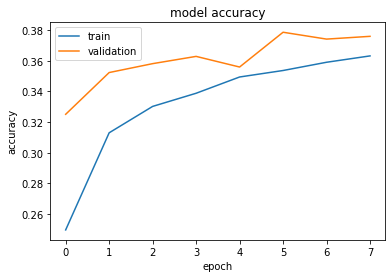

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

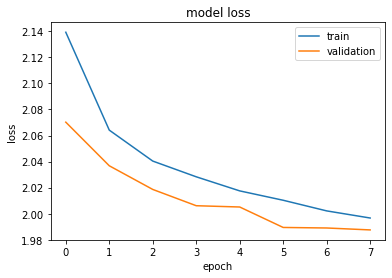

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# evulate model
results = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.9883 - accuracy: 0.3696
